# Multiclass Classification on Iris Dataset Using Logistic Regression

This notebook demonstrates how to perform multiclass classification on the famous Iris dataset. The objective is to classify iris flowers into one of three species based on four features: sepal length, sepal width, petal length, and petal width. Logistic Regression is used here as a baseline classification model, along with data preprocessing and evaluation.


In [1]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_auc_score, roc_curve,auc
from sklearn.preprocessing import label_binarize

## Load Iris Dataset

We load the Iris dataset from sklearn and convert it into a pandas DataFrame for easy manipulation.


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(data = np.c_[iris.data, iris.target],
                columns=iris.feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Dataset Overview

The dataset contains 150 samples with 4 numeric features each, describing the characteristics of iris flowers. The target consists of 3 classes representing the species: setosa, versicolor, and virginica.


## Prepare Data: Train-Test Split and Scaling

Split the dataset into features (`X`) and target (`y`), then perform an 80-20 train-test split.  
Scale features using StandardScaler to standardize the numeric data for better model training.


In [ ]:
x=df.drop('target',axis=1)
y=df['target']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Train Logistic Regression Classifier

Fit a logistic regression model to the training data for multiclass classification.


In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

## Evaluate Model Performance

Predict test set labels and evaluate model accuracy, confusion matrix, and classification report.


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

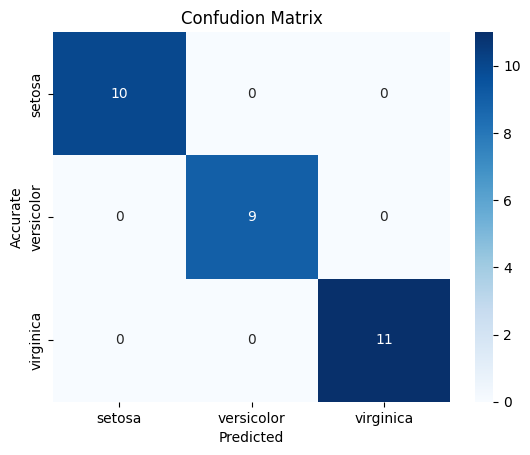

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,cmap='Blues',fmt='d',xticklabels=iris.target_names,yticklabels = iris.target_names)

plt.xlabel('Predicted')
plt.ylabel('Accurate')
plt.title('Confudion Matrix')
plt.show()

In [ ]:
y_test_bin = label_binarize(y_test, classes = [0,1,2])
y_pred_bin = model.predict_proba(x_test)

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
  fpr[i], tpr[i],_ = roc_curve(y_test_bin[:,i],y_pred_bin[:,i])
  roc_auc[i]=auc(fpr[i],tpr[i])

Text(0.5, 1.0, 'Receiver Operating Chareteristics')

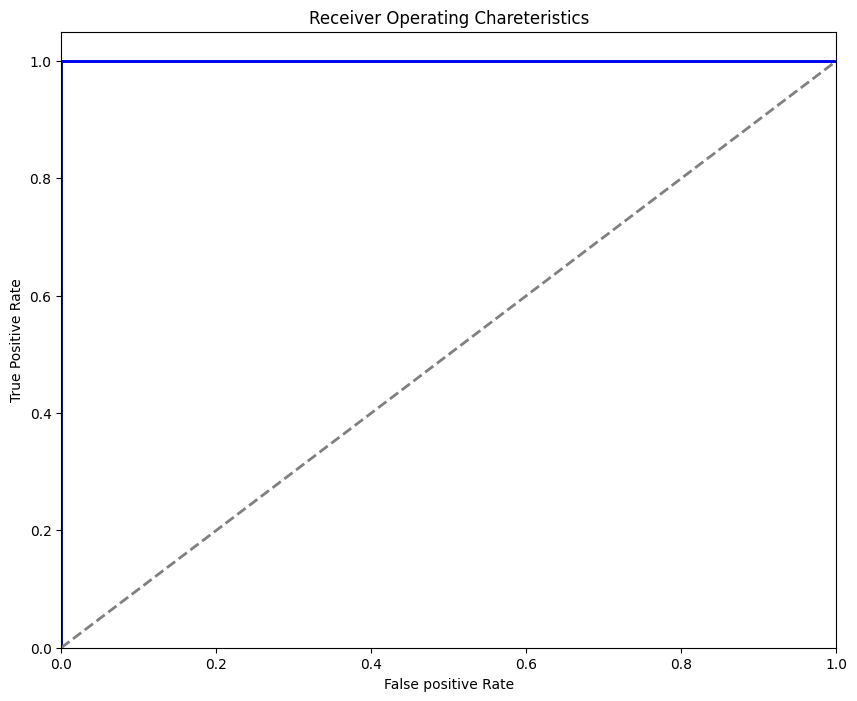

In [ ]:
plt.figure(figsize=(10,8))
colors = ['red','green','blue']

for i in range(3):
  plt.plot(fpr[i],tpr[i],color=colors[i],lw=2,label=f'ROC curve(area={roc_auc[i]:2f})')
plt.plot([0,1],[0,1],color='gray',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Chareteristics')

## Conclusion

The logistic regression model successfully classifies iris species with strong accuracy. The confusion matrix and classification report confirm consistent performance across all classes.

## Future Directions

- Experiment with other classifiers (e.g., SVM, Random Forest)
- Perform hyperparameter tuning for improved model performance
- Explore dimensionality reduction with PCA for visualization and possibly better generalization
